In [3]:
import emlearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier as lgb
from sklearn.svm import SVC

import m2cgen as m2c


In [33]:
squat = pd.read_csv('dataset/squat.csv', header=None)
run = pd.read_csv('dataset/run.csv', header=None)
stand = pd.read_csv('dataset/standing.csv', header=None)

stand['label'] = 0
squat['label'] = 1
run['label'] = 2

In [37]:
s_stand = stand[400:1000]
s_squat = squat[6:600]
s_run = run[0:600]

In [38]:
df = pd.concat([s_stand, s_squat, s_run], ignore_index=True)
df

0      1      2     3      4      5     6      7      8     9  ...  \
0        8   -122     41     0   -119     60    -3   -109     63    -6  ...   
1        6    -61    -11     6    -48    -21     5    -39    -23    -4  ...   
2     -111    -42     86  -105    -37     78   -95    -35     74   -82  ...   
3       61    -23      0    58     -6      0    50     24     -9    57  ...   
4       89    -45    133   101    -38    123   120    -25    117   135  ...   
...    ...    ...    ...   ...    ...    ...   ...    ...    ...   ...  ...   
1789 -2383 -28132   3485 -2829 -29320   3898 -3292 -30399   4293 -3778  ...   
1790 -6437   5458 -10363 -6493   5578 -10348 -6494   5665 -10301 -6440  ...   
1791 -5181  -8765   5673 -5230  -9010   5514 -5285  -9231   5417 -5336  ...   
1792   673  21097   8001   817  21092   8105   912  21076   8177  1051  ...   
1793 -3744  -2379  -3109 -3510  -2292  -3067 -3355  -2235  -3028 -3225  ...   

       141    142   143    144    145   146    147    148   149  label  
0       44    -94    -2     46    -80    10     46    -70    16      0  
1      -20    -45    46    -22    -52    52    -23    -44    51      0  
2      -27    -63    33    -12    -66    29    -17    -65    43      0  
3       21    -64   -17     22    -55   -15     25    -42    -8      0  
4       31    -48    87     64    -32   107     60    -16   108      0  
...    ...    ...   ...    ...    ...   ...    ...    ...   ...    ...  
1789 -8866 -14313  9676  -8712 -13271  9664  -8571 -12285  9626      2  
1790 -3501  10403 -5671  -3505  10796 -5426  -3437  10970 -5259      2  
1791  9382  -9875  4140  10109 -10006  4081  10812 -10090  3931      2  
1792 -6504  -1504 -4816  -6730  -1971 -5026  -6937  -2403 -5212      2  
1793  1675   2148  3499   1878   2143  3910   1951   2121  4096      2  

[1794 rows x 151 columns]

In [39]:
X = df.drop('label', axis=1)
y = df['label']

In [75]:
rfc = RandomForestClassifier()
rfc.fit(X, y)
pred = rfc.predict(X)
print(confusion_matrix(y, pred))

scores = cross_val_score(rfc, X, y, cv=3, scoring='f1_macro')
print(scores)

[[600   0   0]
 [  0 594   0]
 [  0   0 600]]
[0.93937139 0.91954615 0.97150003]


In [213]:
# n_estimators = [100, 300, 500, 800, 1200]
n_estimators = [50, 100]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rfc, hyperF, cv = 3, scoring='f1_macro',
                     verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.1min finished


In [214]:
print("Best parameters from gridsearch: {}".format(gridF.best_params_))
print("CV score=%0.3f" % gridF.best_score_)
cv_results = gridF.cv_results_

Best parameters from gridsearch: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
CV score=0.755


In [80]:
pred = bestF.predict(X)
print(confusion_matrix(y, pred))

[[600   0   0]
 [  0 594   0]
 [  0   0 600]]


In [81]:
metrics.f1_score(y, pred, average=None)

array([1., 1., 1.])

In [82]:
bestF

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [18]:
# cmodel = emlearn.convert(estimator, method='inline')
# cmodel.save(file='rf_model.h')

In [54]:
knn = KNeighborsClassifier()
knn.fit(X, y)
pred = knn.predict(X)
print(confusion_matrix(y, pred))

scores = cross_val_score(knn, X, y, cv=5, scoring='f1_macro')
print(scores)

[[599   1   0]
 [ 20 573   1]
 [  0  36 564]]
[0.94960818 0.97209636 0.93866042 0.92735687 0.95794774]


In [41]:
estimator = GaussianNB()
estimator.fit(X, y)
pred = estimator.predict(X)
print(confusion_matrix(y, pred))

[[576  24   0]
 [  0 562  32]
 [  0  79 521]]


In [57]:
svm = SVC(kernel='rbf', gamma=0.001, random_state=42).fit(X, y)
pred = svm.predict(X)
print(confusion_matrix(y, pred))

scores = cross_val_score(svm, X, y, cv=2, scoring='f1_macro')
print(scores)

[[600   0   0]
 [  0 594   0]
 [  0   0 600]]
[0.16943892 0.16943892]


In [44]:
lgb = lgb()
lgb.fit(X, y)
pred = lgb.predict(X)
print(confusion_matrix(y, pred))

[[600   0   0]
 [  0 594   0]
 [  0   0 600]]


In [46]:
code = m2c.export_to_c(estimator)

In [47]:
f = open( 'lgb.txt', 'w' )
f.write(code)
f.close()

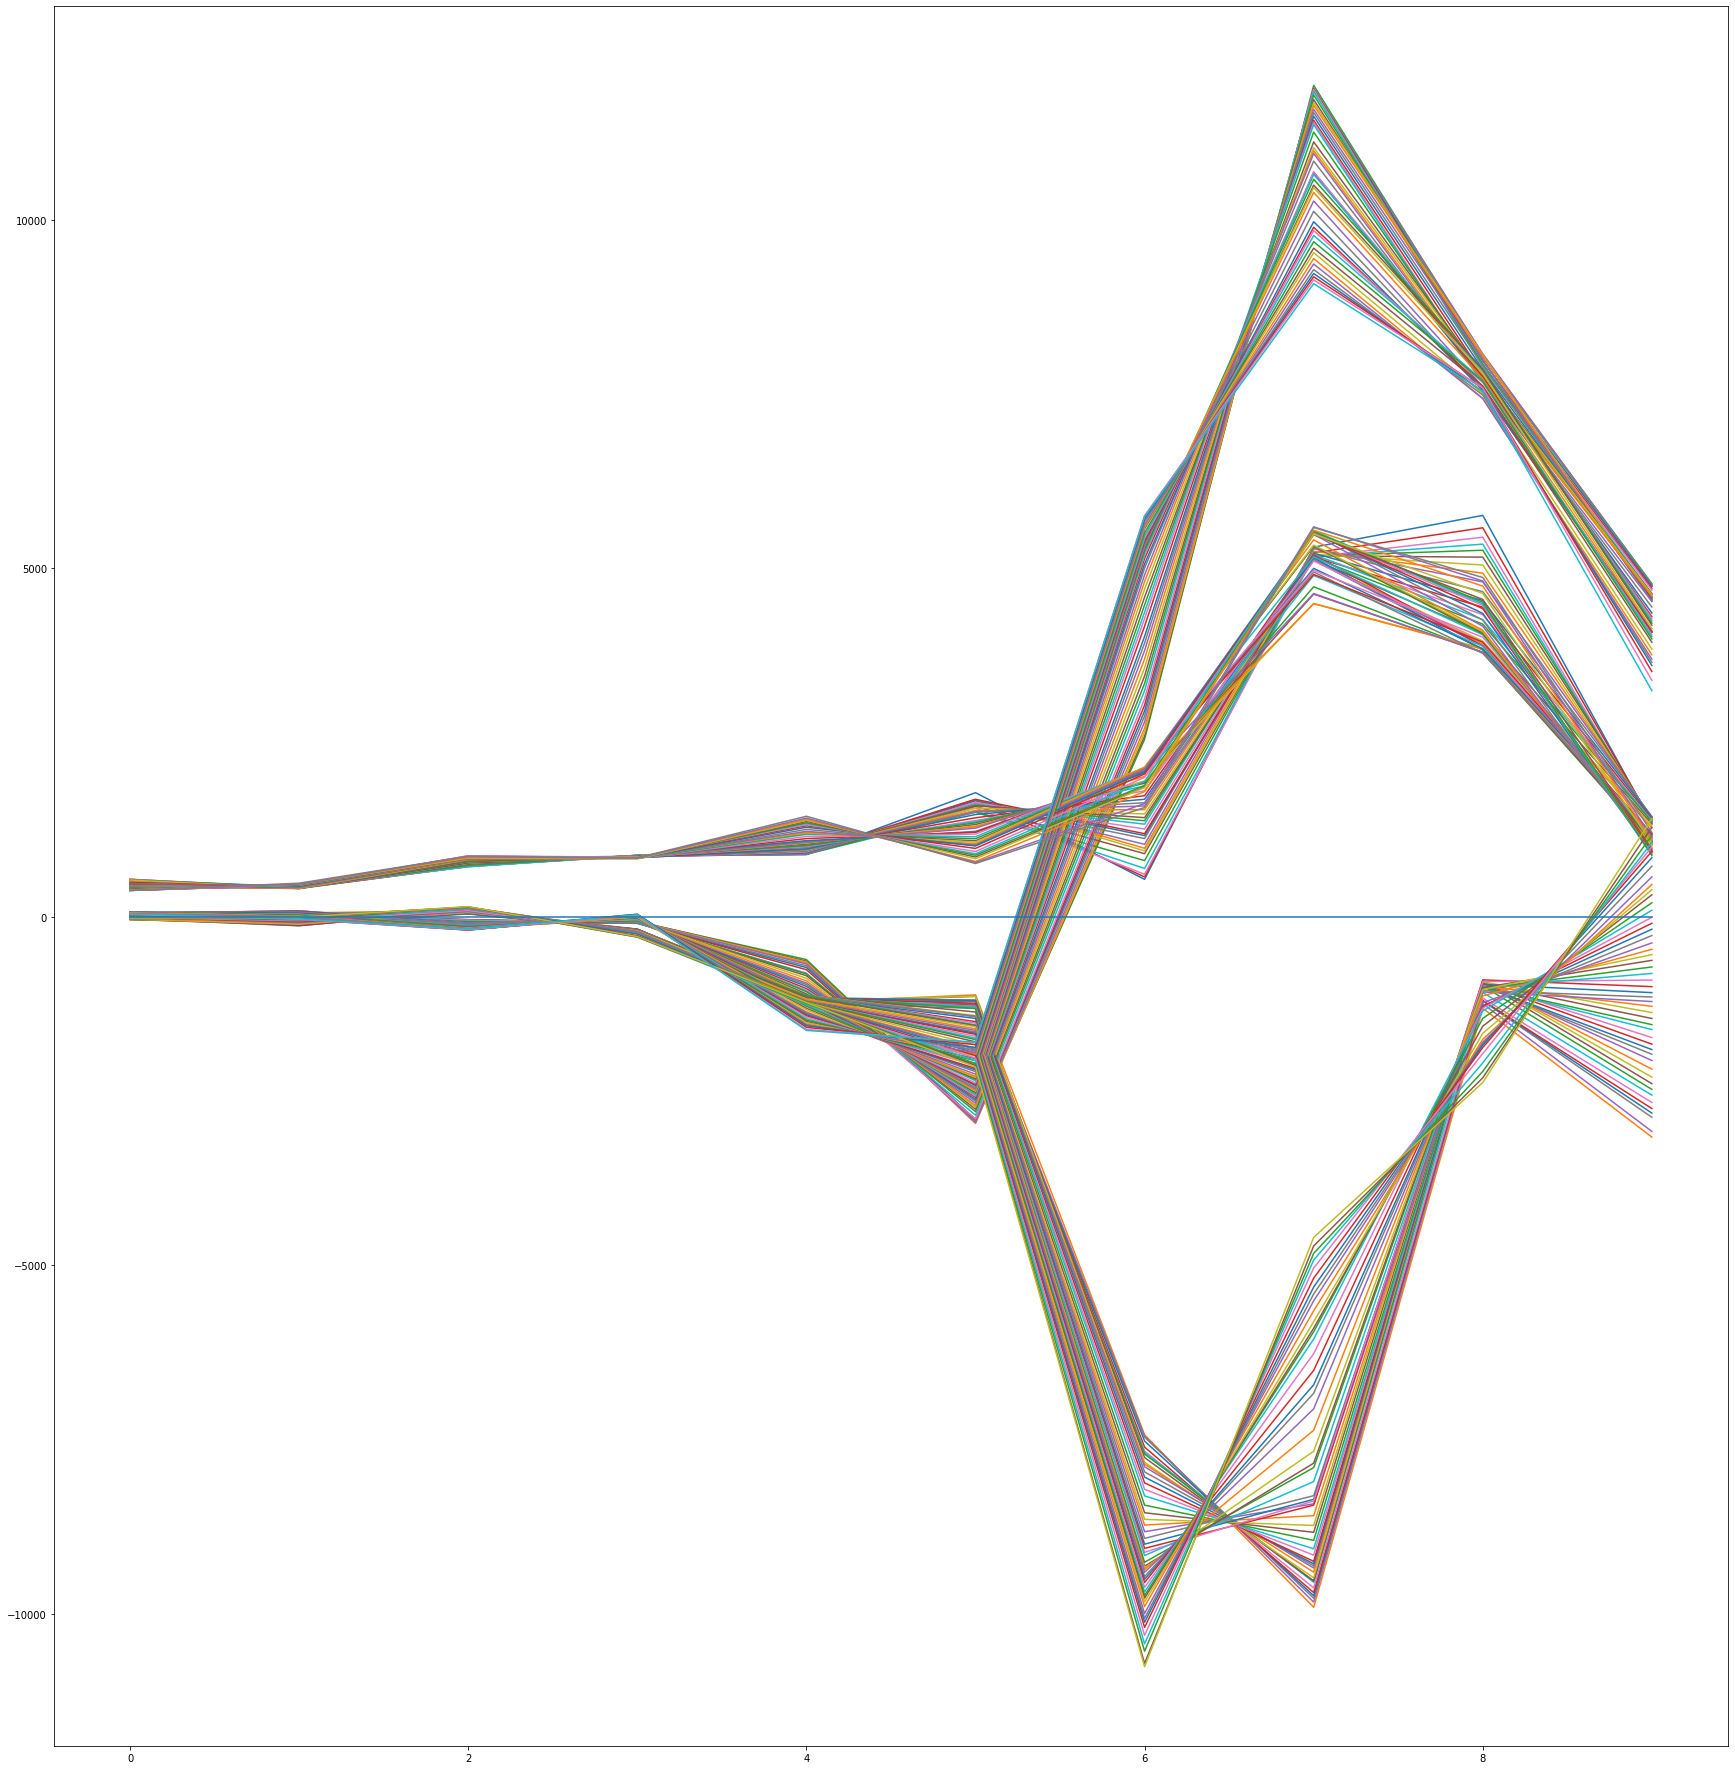

In [36]:
plt.figure(figsize=(30, 32))
plt.plot(squat[0:10])

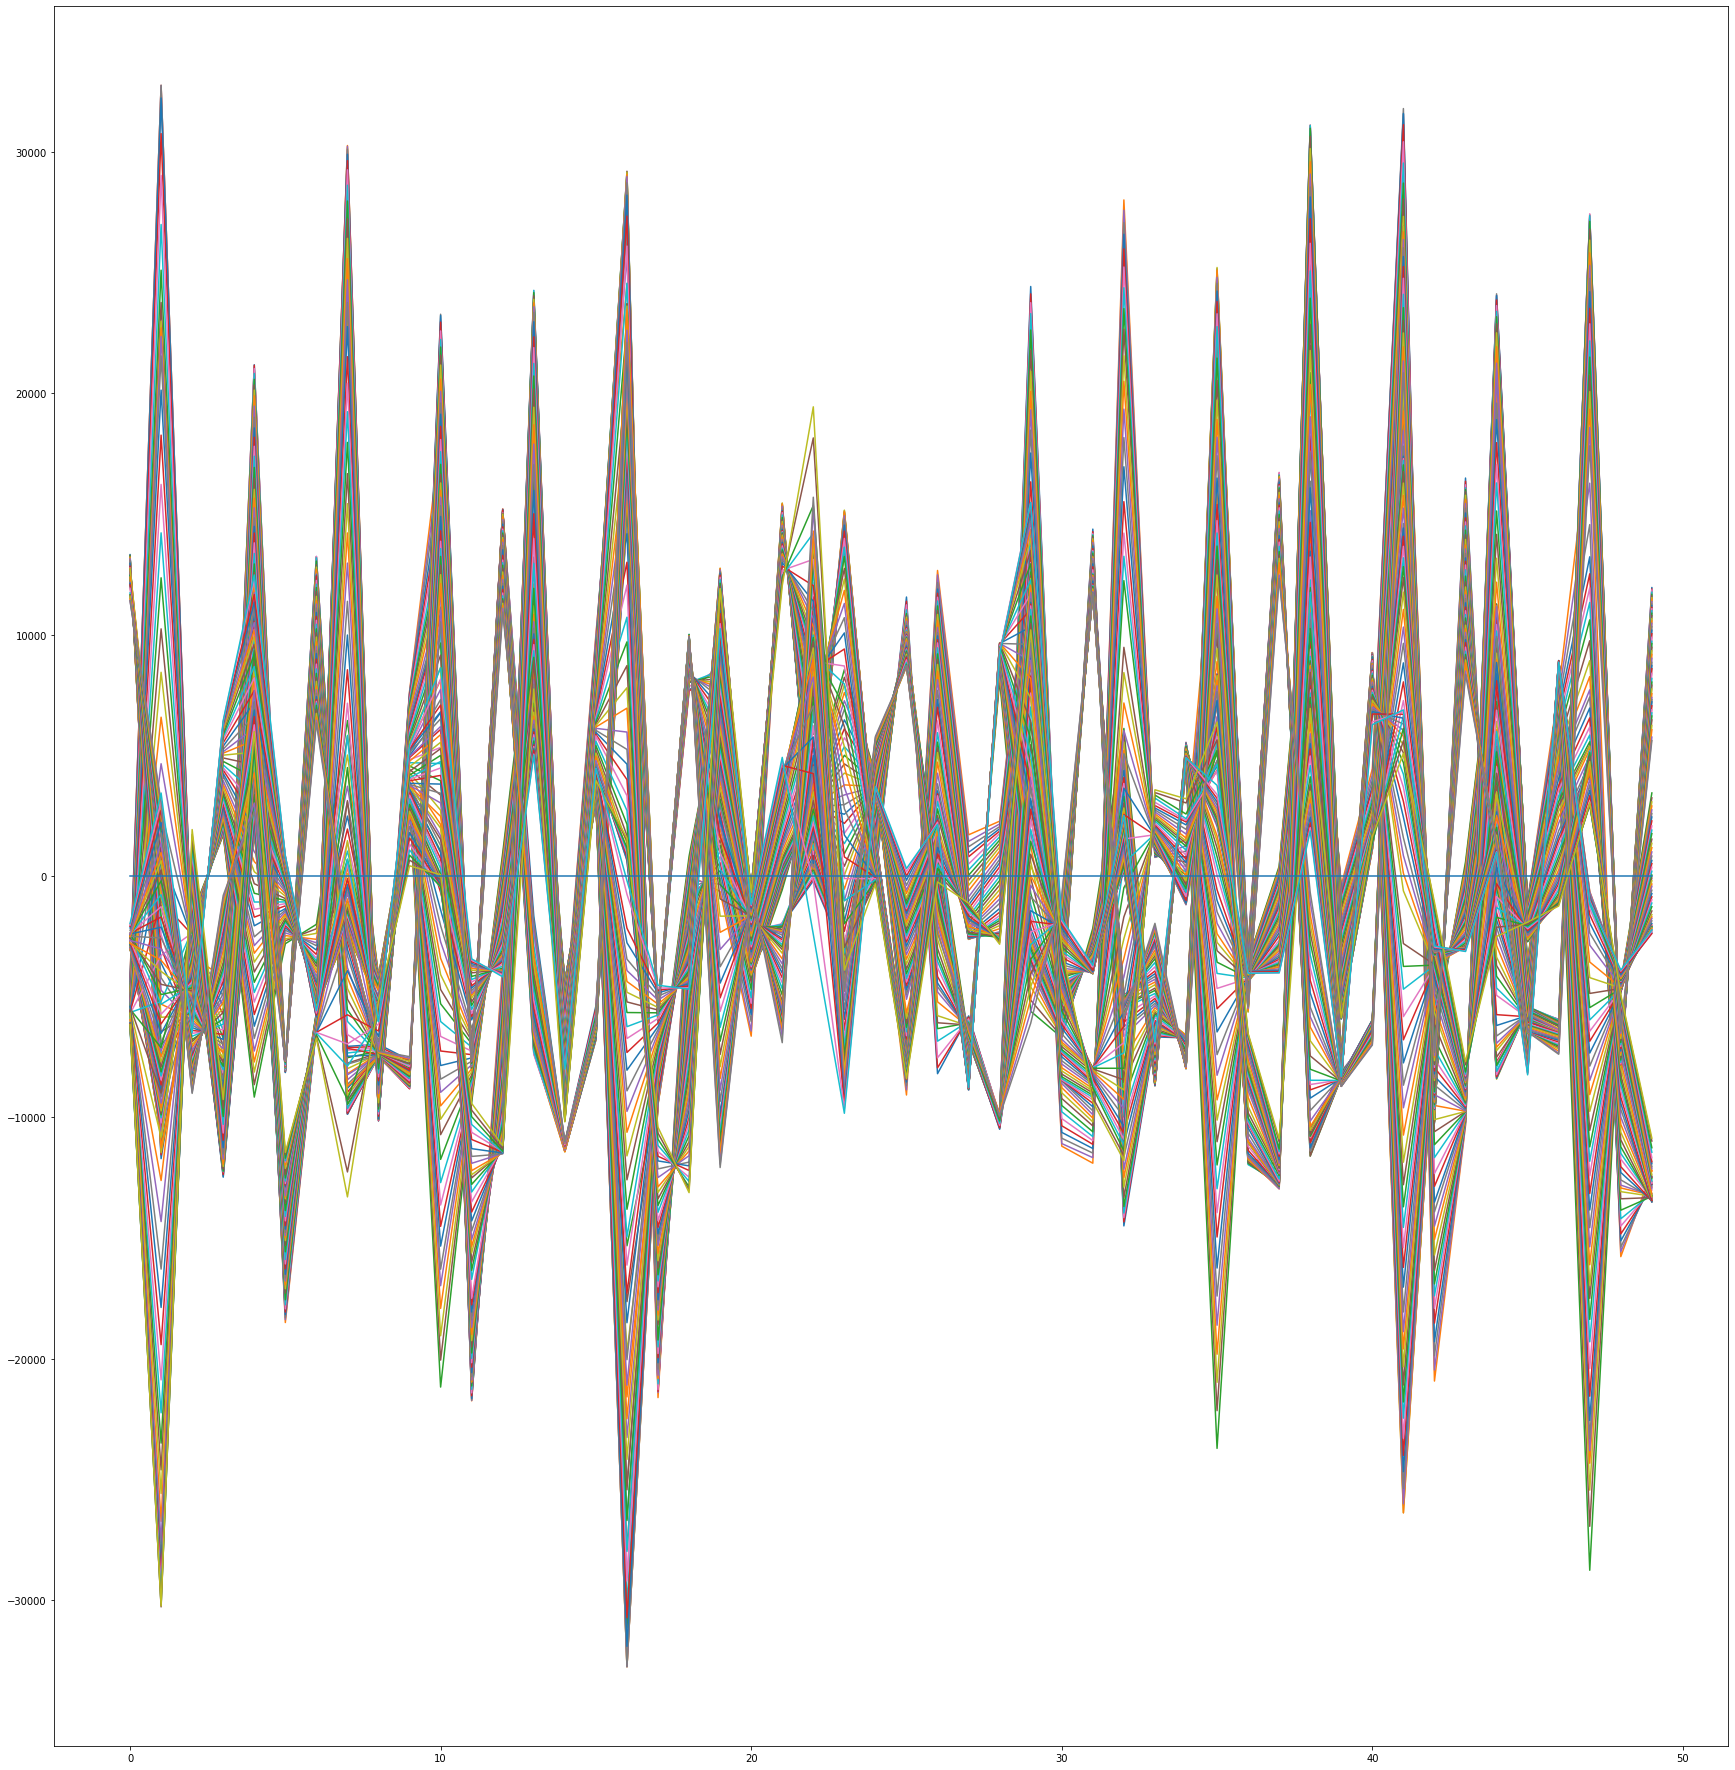

In [35]:
plt.figure(figsize=(30, 32))
plt.plot(run[0:50])

In [60]:
sit_stand = pd.read_csv('sit_stand.csv', header=None)

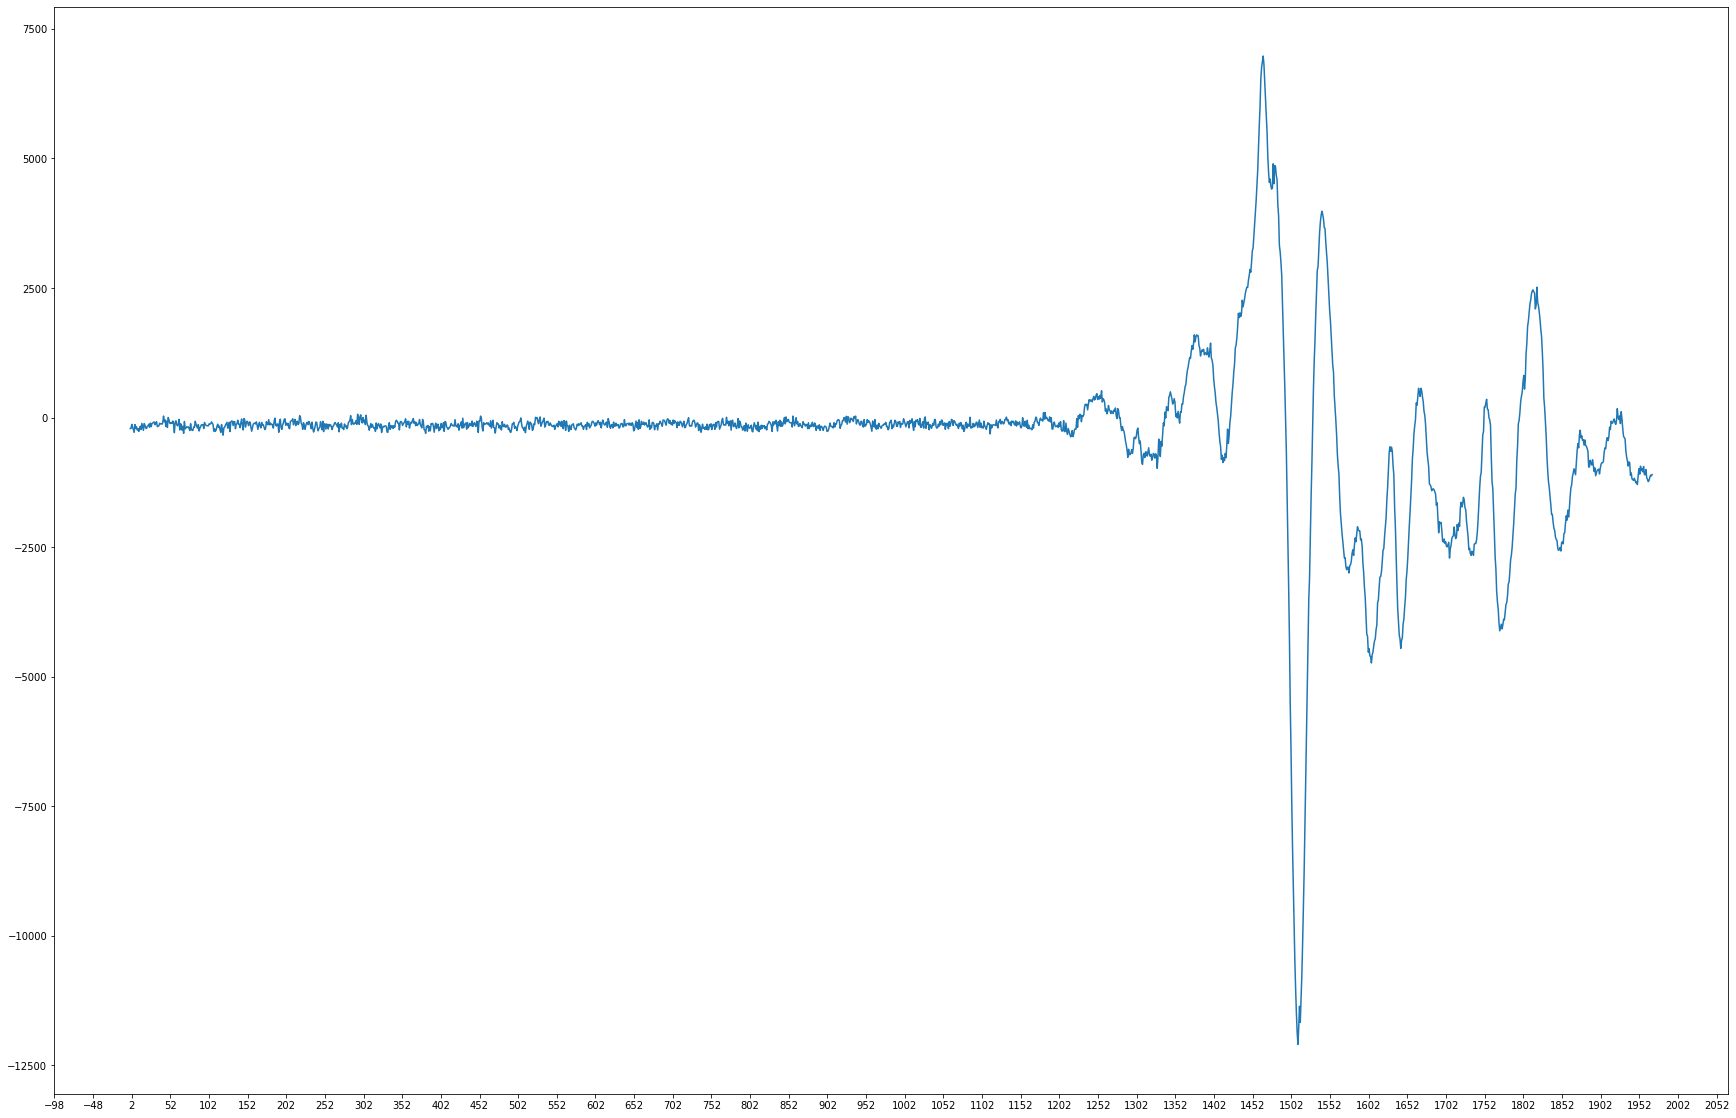

In [61]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.plot(sit_stand.index, sit_stand[0])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 50))

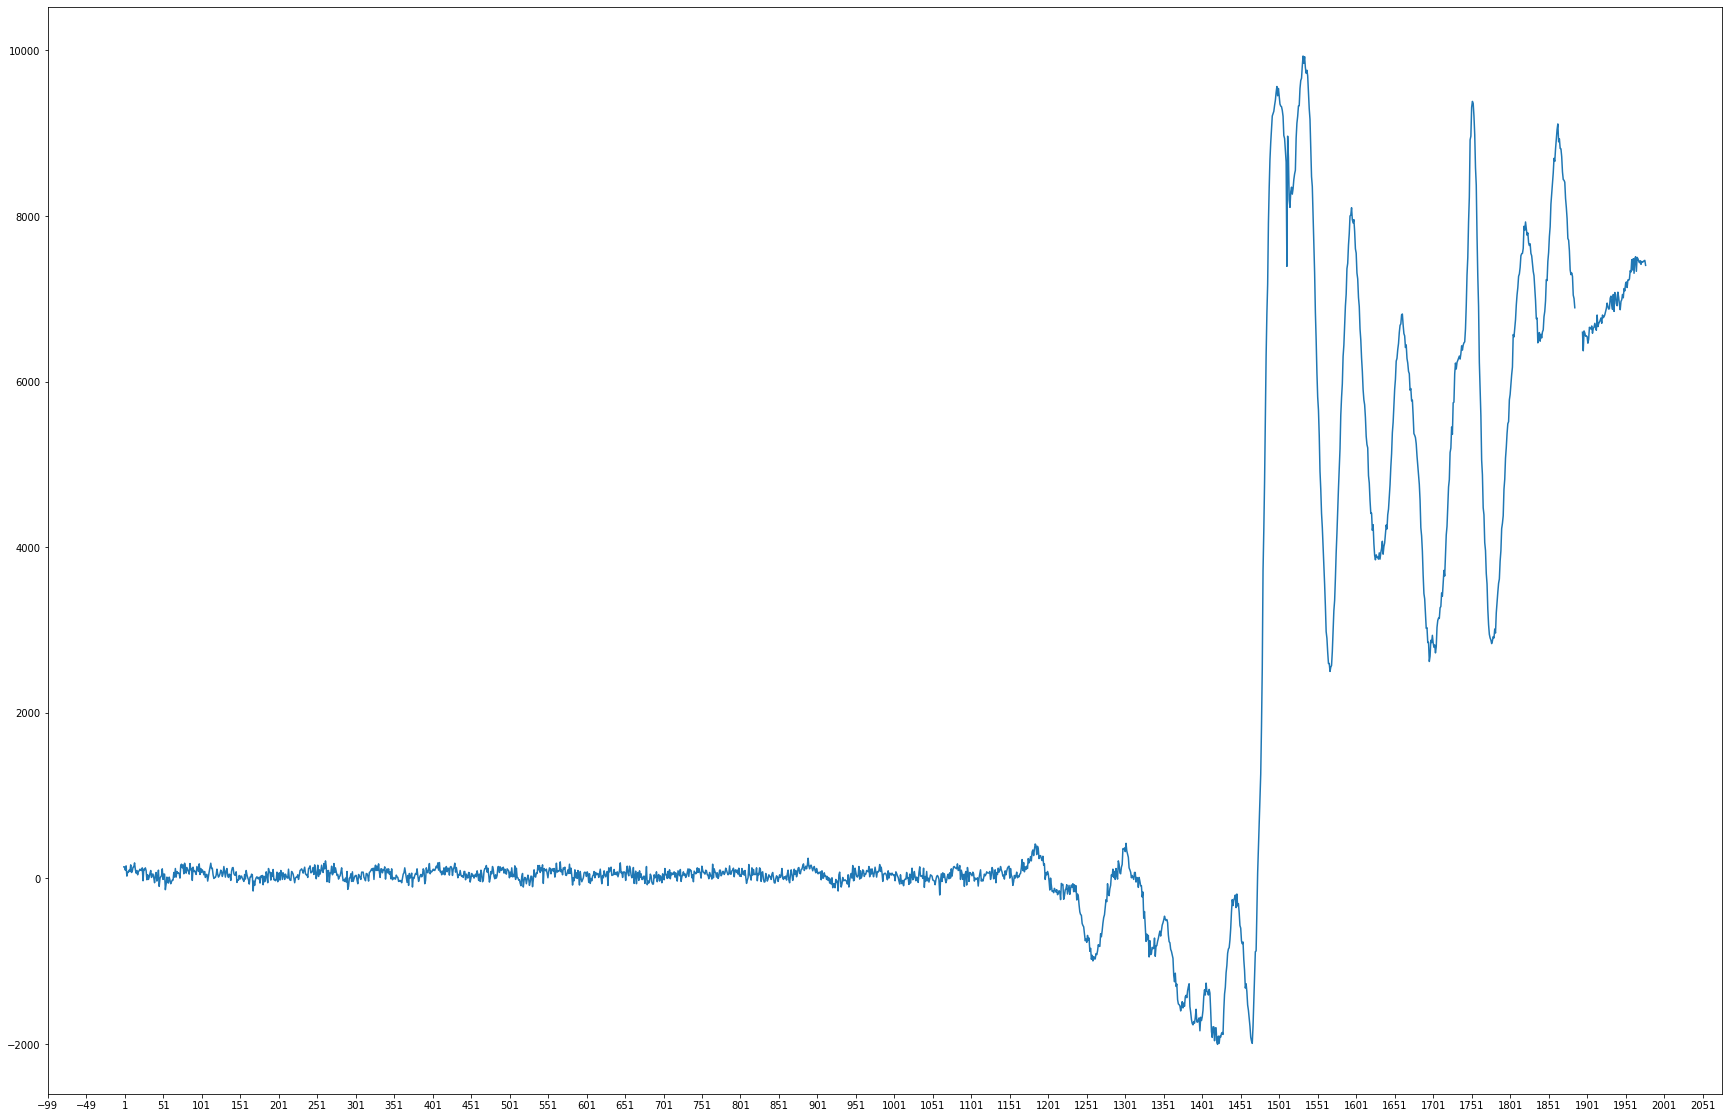

In [29]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.plot(sit_stand.index, sit_stand[1])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 50))

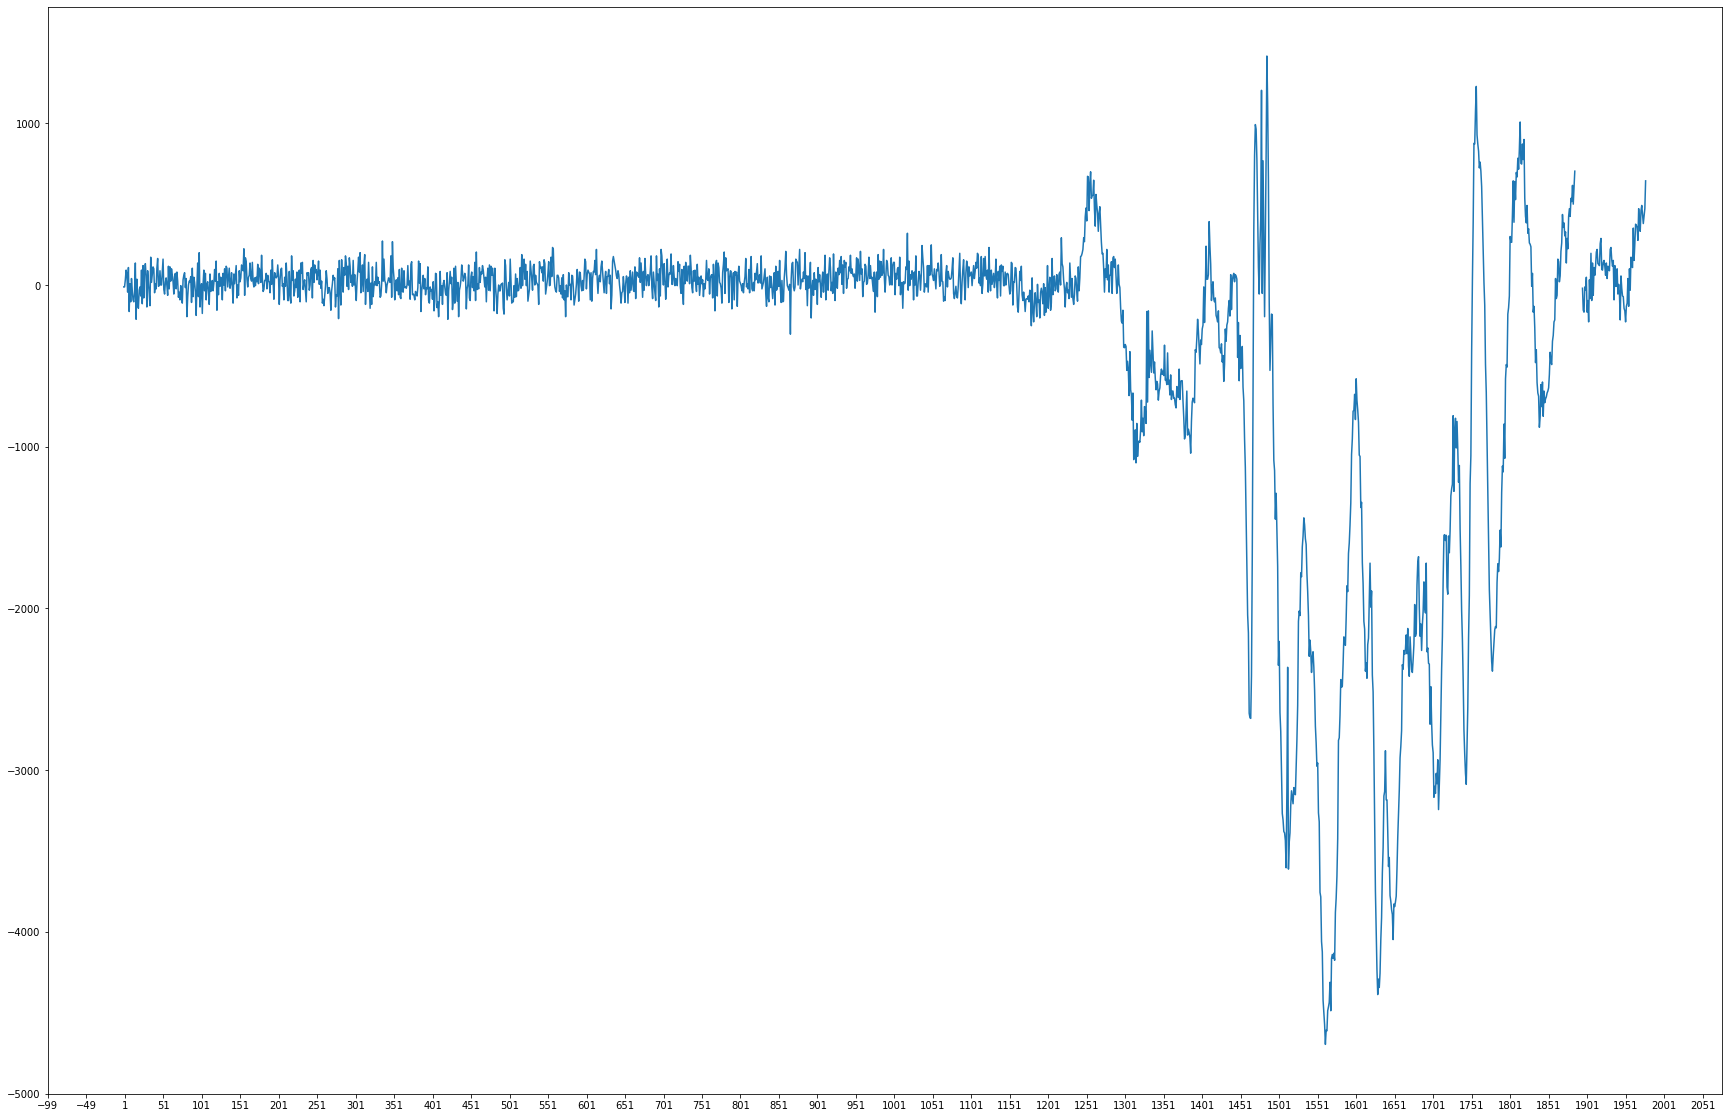

In [30]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.plot(sit_stand.index, sit_stand[2])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 50))

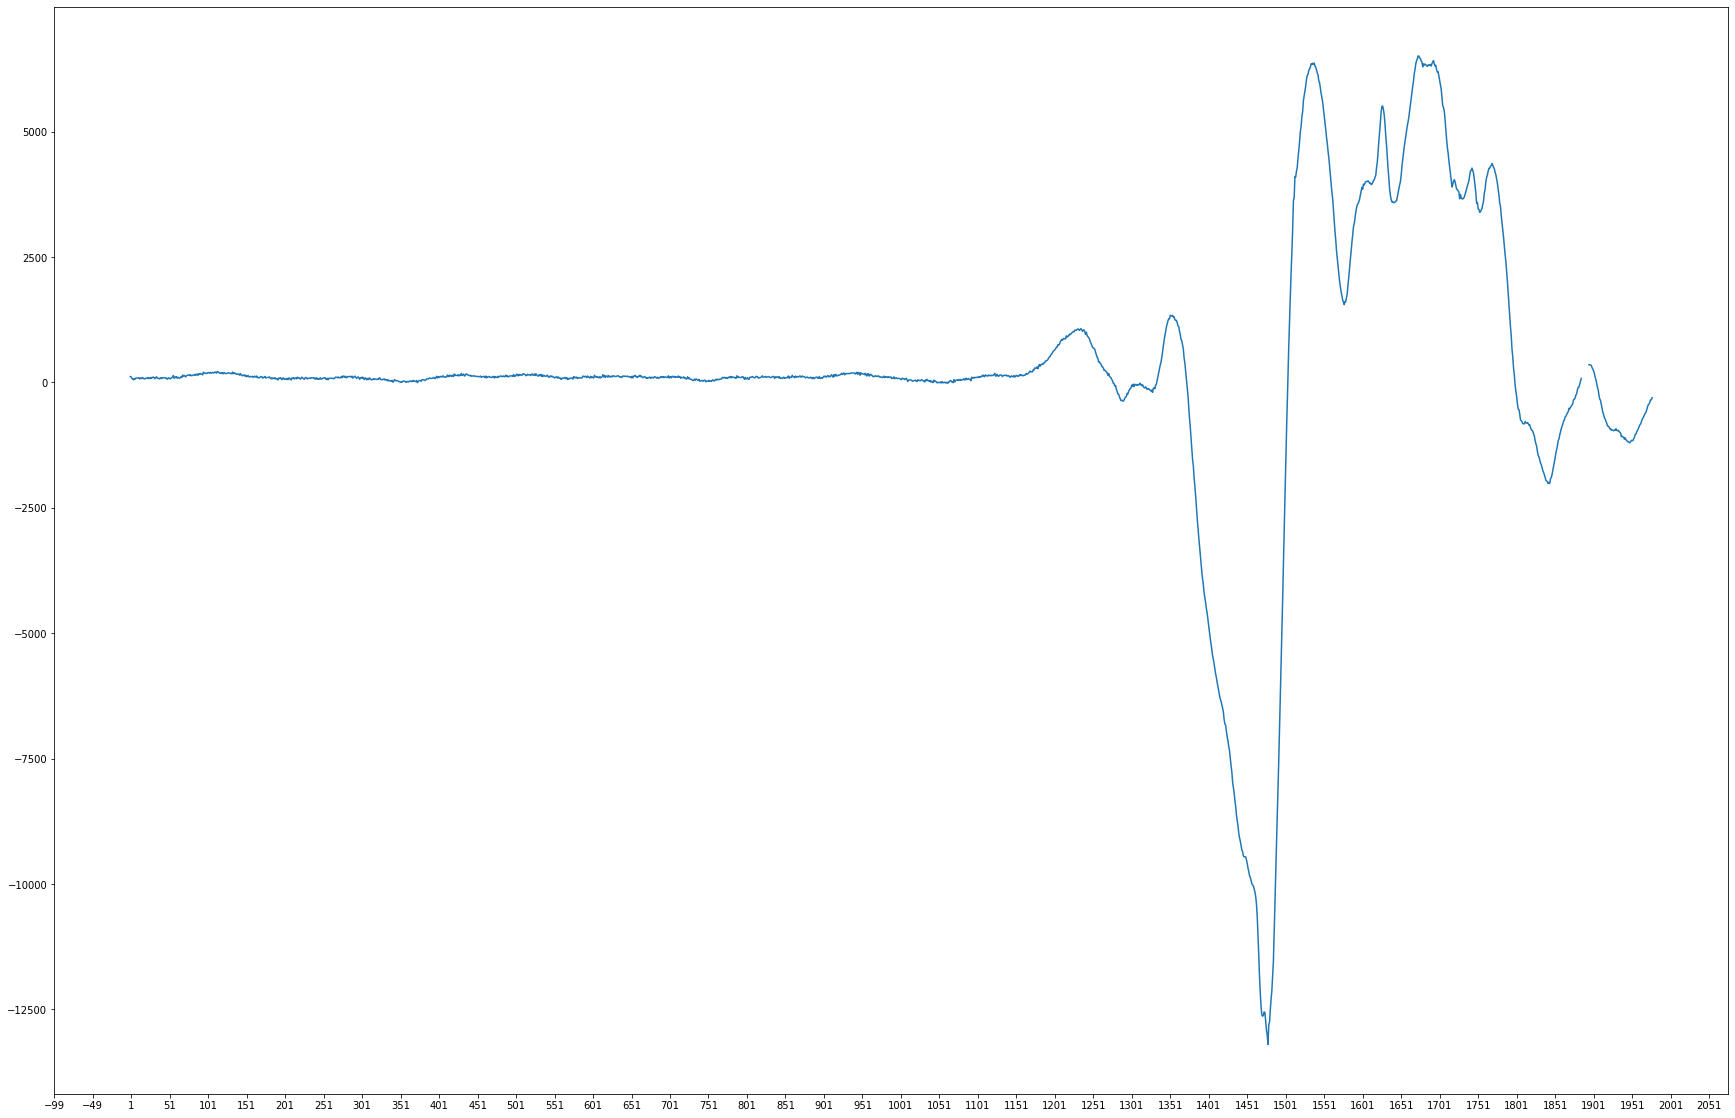

In [28]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.plot(sit_stand.index, sit_stand[3])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 50))

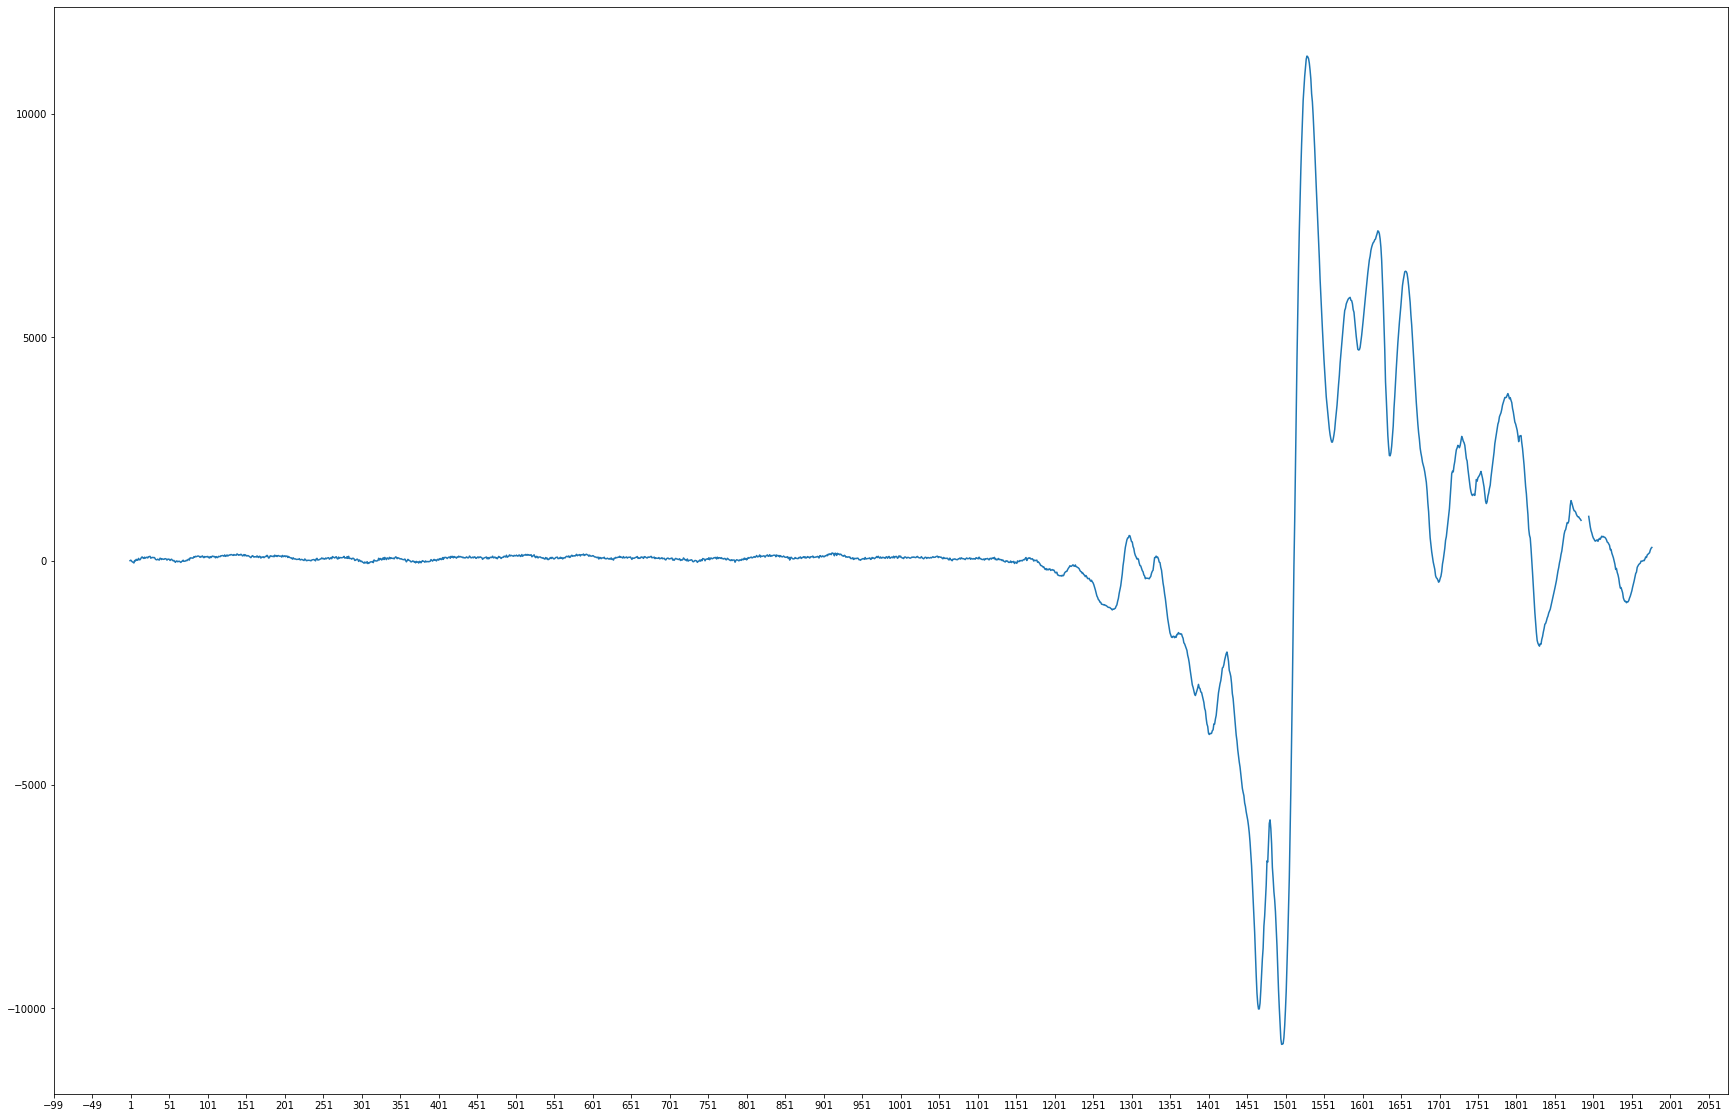

In [31]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.plot(sit_stand.index, sit_stand[4])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 50))

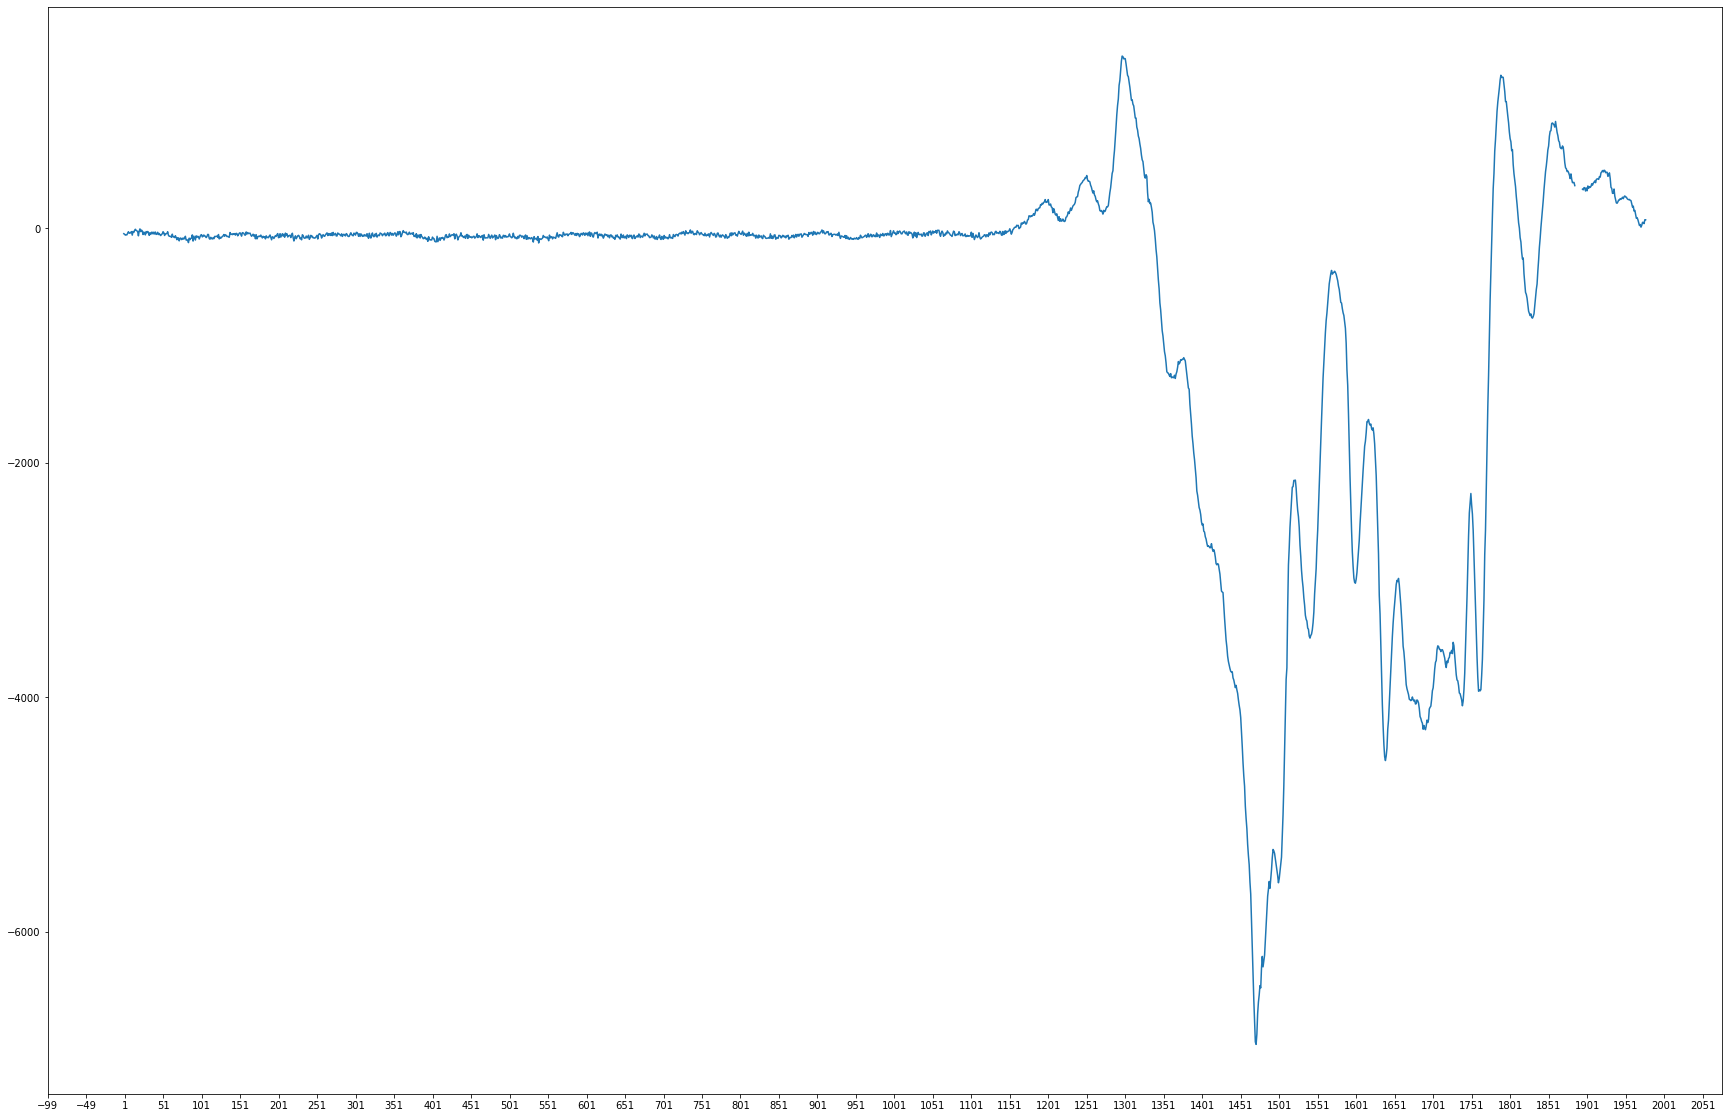

In [32]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.plot(sit_stand.index, sit_stand[5])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 50))

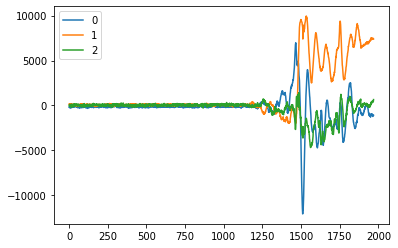

In [63]:
sit_stand[[0,1,2]].plot()

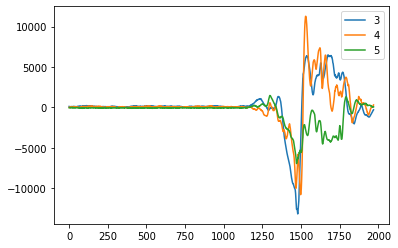

In [64]:
sit_stand[[3,4,5]].plot()

In [67]:
a = pd.read_csv('a.csv', header=None)

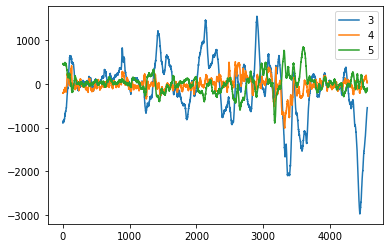

In [68]:
a[[3,4,5]].plot()

In [179]:
a[[3,4,5]].max()

3    1556
4     513
5     848
dtype: int64

In [180]:
a[[3,4,5]].min()

3   -2982
4   -1014
5    -891
dtype: int64

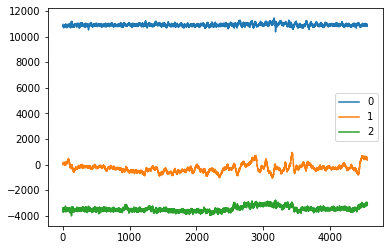

In [69]:
a[[0,1,2]].plot()

In [76]:
b = pd.read_csv('b.csv', header=None)

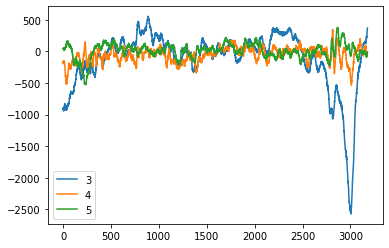

In [77]:
b[[3,4,5]].plot()

In [178]:
b[[3,4,5]].min()

3   -2570
4    -536
5    -530
dtype: int64

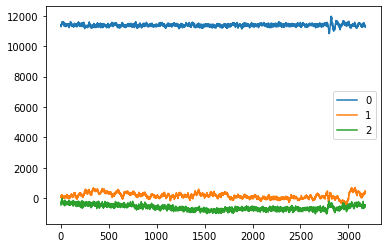

In [78]:
b[[0,1,2]].plot()

In [29]:
w150_run = pd.read_csv('dataset\w150_run.csv', header=None)

In [30]:
w150_run[0][:]

0     -9891
1      5399
2     -8820
3      2151
4     -6164
       ... 
178    -864
179    2424
180   -3637
181    3436
182   -8404
Name: 0, Length: 183, dtype: int64

In [31]:
x_axis = np.arange(0,151,3)

x = w150_run[[c for c in w150_run.columns if c in x_axis]]

In [32]:
x0 = x[:5].T[0]
x1 = x[:5].T[1]
x2 = x[:5].T[2]
x3 = x[:5].T[3]
x4 = x[:5].T[4]
x5 = x[:10].T[5]
x6 = x[:10].T[6]
x7 = x[:10].T[7]
x8 = x[:10].T[8]
x9 = x[:10].T[9]

x_df = pd.concat([x0,x1,x2,x3,x4, x5, x6, x7, x8, x9], ignore_index=True)

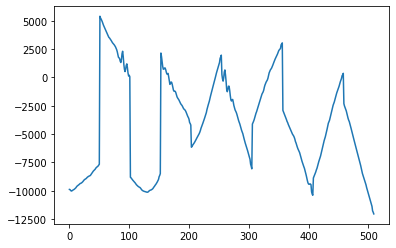

In [33]:
x_df.plot()

In [34]:
y_axis = np.arange(1,151,3)

y = w150_run[[c for c in w150_run.columns if c in y_axis]]

In [35]:
y0 = y[:5].T[0]
y1 = y[:5].T[1]
y2 = y[:5].T[2]
y3 = y[:5].T[3]
y4 = y[:5].T[4]
y5 = y[:10].T[5]
y6 = y[:10].T[6]
y7 = y[:10].T[7]
y8 = y[:10].T[8]
y9 = y[:10].T[9]

y_df = pd.concat([y0,y1,y2,y3,y4, y5, y6, y7, y8, y9], ignore_index=True)

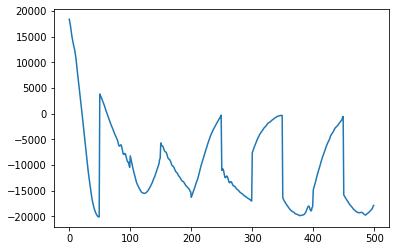

In [36]:
y_df.plot()

In [37]:
z_axis = np.arange(1,151,3)

z = w150_run[[c for c in w150_run.columns if c in z_axis]]

z0 = z[:5].T[0]
z1 = z[:5].T[1]
z2 = z[:5].T[2]
z3 = z[:5].T[3]
z4 = z[:5].T[4]
z5 = z[:10].T[5]
z6 = z[:10].T[6]
z7 = z[:10].T[7]
z8 = z[:10].T[8]
z9 = z[:10].T[9]

z_df = pd.concat([z0,z1,z2,z3,z4, z5, z6, z7, z8, z9], ignore_index=True)

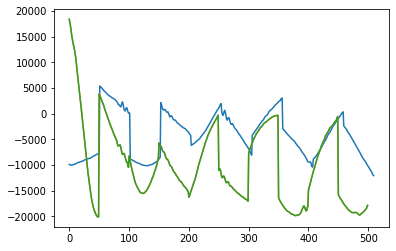

In [38]:
x_df.plot()
y_df.plot()
z_df.plot()

In [185]:
x.describe()[max]

count      183.000000
mean     -1950.344262
std       6158.952034
min     -14562.000000
25%      -7232.500000
50%      -1666.000000
75%       2881.000000
max      13179.000000
Name: 150, dtype: float64

In [187]:
y.describe()[max]

count      183.000000
mean     -3883.005464
std      14390.849904
min     -32768.000000
25%     -15069.500000
50%      -5028.000000
75%       1498.000000
max      32767.000000
Name: 148, dtype: float64

In [188]:
z.describe()[max]

count      183.000000
mean     -3883.005464
std      14390.849904
min     -32768.000000
25%     -15069.500000
50%      -5028.000000
75%       1498.000000
max      32767.000000
Name: 148, dtype: float64

In [23]:
stand150 = pd.read_csv('dataset\w150_stand.csv', header=None)
walk150 = pd.read_csv('dataset\w150_walk.csv', header=None)
run150 = pd.read_csv('dataset\w150_run.csv', header=None)
squat150 = pd.read_csv('dataset\w150_squat.csv', header=None)
jump150 = pd.read_csv('dataset\w150_jump.csv', header=None)

In [39]:
run150.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Columns: 450 entries, 0 to 449
dtypes: int64(450)
memory usage: 643.5 KB


In [40]:
squat150.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Columns: 450 entries, 0 to 449
dtypes: int64(450)
memory usage: 299.0 KB


In [42]:
stand150['label'] = 0 
walk150['label'] = 1
run150['label'] = 2
squat150['label'] = 3 
jump150['label'] = 4

In [205]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
missing_values_table(stand150)
missing_values_table(walk150)
missing_values_table(run150)
missing_values_table(squat150)
missing_values_table(jump150)

Your selected dataframe has 450 columns.
There are 0 columns that have missing values.
Your selected dataframe has 450 columns.
There are 0 columns that have missing values.
Your selected dataframe has 450 columns.
There are 0 columns that have missing values.
Your selected dataframe has 450 columns.
There are 162 columns that have missing values.
Your selected dataframe has 450 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [208]:
df = pd.concat([stand150, walk150, run150, squat150, jump150], ignore_index=True)
df

0      1      2     3      4      5     6      7      8     9  ...  \
0     746    -30   -174   750    -26   -167   752    -22   -164   744  ...   
1     556   -103     98   571   -112     89   575   -121     90   576  ...   
2     -69    -20    235   -59    -34    243   -60    -51    241   -59  ...   
3     332    106    161   330    112    171   331    117    180   341  ...   
4      37     21     67    23     25     70    20     32     71    20  ...   
..    ...    ...    ...   ...    ...    ...   ...    ...    ...   ...  ...   
509  -658  -2044  -2990  -605  -1954  -2947  -561  -1872  -2923  -513  ...   
510 -3797 -11216  -1951 -3808 -11110  -1892 -3819 -11014  -1860 -3838  ...   
511  4351 -11317  11297  4407 -10357  11263  4471  -9702  11211  4572  ...   
512  -270  -8548  -4280  -341  -8874  -4354  -411  -9135  -4426  -492  ...   
513  4575  13891   8160  4583  14066   8489  4605  14240   8824  4620  ...   

      441    442   443   444    445   446   447    448   449  label  
0     871    146    15   867    153     7   862    167    -9      0  
1     601     -4   -53   600    -16   -49   611    -36   -40      0  
2      98     56   216   117     66   217   127     69   222      0  
3     278     94   129   282    101   118   296    116    99      0  
4     -88     51   -22   -90     48   -20   -89     39    -9      0  
..    ...    ...   ...   ...    ...   ...   ...    ...   ...    ...  
509  2110  11038  7791  2096  11073  7763  2088  11103  7732      4  
510  3398  13295  4761  3439  13277  4757  3464  13269  4731      4  
511 -5739 -12871 -1345 -5770 -12868 -1333 -5787 -12866 -1328      4  
512 -6680 -10367 -9599 -6659 -10480 -9503 -6621 -10599 -9381      4  
513  9484  -9797  9058  9308  -8775  9391  9135  -7870  9637      4  

[514 rows x 451 columns]

In [211]:
X = df.drop('label', axis=1)
y = df['label']

rfc = RandomForestClassifier()
rfc.fit(X, y)
pred = rfc.predict(X)
print(metrics.confusion_matrix(y, pred))

scores = cross_val_score(rfc, X, y, cv=5, scoring='f1_macro')
print(scores)

[[ 85   0   0   0   0]
 [  0  72   0   0   0]
 [  0   0 183   0   0]
 [  0   0   0  85   0]
 [  0   0   0   0  89]]
[0.7122367  0.73116531 0.78033651 0.80464092 0.83742968]


In [217]:
# n_estimators = [100, 300, 500, 800, 1200]
n_estimators = [50, 75, 100, 120]
max_depth = [5, 8, 12, 15,21, 25,26, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rfc, hyperF, cv = 3, scoring='f1_macro',
                     verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X, y)

print("Best parameters from gridsearch: {}".format(gridF.best_params_))
print("CV score=%0.3f" % gridF.best_score_)
cv_results = gridF.cv_results_

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  3.9min finished


Best parameters from gridsearch: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
CV score=0.776


In [237]:
# n_estimators = [100, 300, 500, 800, 1200]
n_estimators = [50, 75, 100, 120]
max_depth = [5, 8, 12, 15,21, 25,26, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rfc, hyperF, cv = 3, scoring='f1_micro',
                     verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X, y)

print("Best parameters from gridsearch: {}".format(gridF.best_params_))
print("CV score=%0.3f" % gridF.best_score_)
cv_results = gridF.cv_results_

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.4s


KeyboardInterrupt: 

In [51]:
rfc = RandomForestClassifier(n_estimators=75, max_depth = 26, min_samples_leaf=1, min_samples_split=5)

scores = cross_val_score(rfc, X, y, cv=10, scoring='f1_macro')
print(scores)
print(np.average(scores))

[0.9237641  0.95816993 0.96534997 0.96534997 1.         1.
 0.93483709 0.93483709 0.96581197 0.93483709]
0.9582957209582597


In [52]:
# cmodel = emlearn.convert(rfc, method='inline')
# cmodel.save(file='rf150_model.h')

In [53]:
rfc = RandomForestClassifier(n_estimators=50, max_depth = 30, min_samples_leaf=1, min_samples_split=5)

scores = cross_val_score(rfc, X, y, cv=10, scoring='f1_macro')
print(scores)
print(np.average(scores))

[0.92690058 0.95816993 0.89520697 0.96534997 1.         1.
 0.96876877 0.89356725 0.96581197 0.93483709]
0.9508612535237922


In [54]:
rfc = RandomForestClassifier(n_estimators=100, max_depth = 8, min_samples_leaf=1, min_samples_split=2)

scores = cross_val_score(rfc, X, y, cv=10, scoring='f1_macro')
print(scores)
print(np.average(scores))

[0.92690058 0.95816993 0.96534997 0.96534997 1.         1.
 0.96876877 0.89356725 1.         0.96876877]
0.9646875239135302


In [255]:
# cmodel = emlearn.convert(rfc, method='inline')
# cmodel.save(file='rf150_s_model.h')

In [47]:
df2 = pd.concat([stand150, walk150, run150], ignore_index=True)
X = df2.drop('label', axis=1)
y = df2['label']

In [48]:
scores = cross_val_score(GaussianNB(), X, y, cv=10, scoring='f1_macro')
print(scores)
print(np.average(scores))

[0.95816993 0.95816993 0.91087344 0.96534997 0.96825397 0.96876877
 0.96876877 0.89356725 1.         0.93483709]
0.952675912490154


In [57]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X,y)

scores = cross_val_score(rfc, X, y, cv=10, scoring='f1_macro')
print(scores)
print(np.average(scores))

[0.96534997 0.95816993 0.96534997 0.96534997 1.         1.
 0.96876877 0.96581197 0.96581197 0.96876877]
0.9723381299851888


In [50]:
rfc = RandomForestClassifier(n_estimators=210)

scores = cross_val_score(rfc, X, y, cv=10, scoring='f1_macro')
print(scores)
print(np.average(scores))

[0.96534997 0.95816993 0.96534997 0.96534997 1.         1.
 0.96876877 0.93483709 0.96581197 0.93483709]
0.9658474750734813


In [58]:
cmodel = emlearn.convert(rfc, method='inline')
cmodel.save(file='rf150_running_model.h')

'\n    // !!! This file is generated using emlearn !!!\n\n    #include <eml_trees.h>\n    \n\nEmlTreesNode rf150_running_model_nodes[2874] = {\n  { 427, -2819.0, 1, 6 },\n  { 443, 450.0, 2, 3 },\n  { -1, 2, -1, -1 },\n  { 400, -4479.5, 2, 4 },\n  { 303, 1278.0, 2, 5 },\n  { -1, 1, -1, -1 },\n  { 85, 142.5, 7, 15 },\n  { 112, -85.0, 8, 14 },\n  { 431, -5199.5, 9, 10 },\n  { 180, 5100.0, 2, 5 },\n  { 67, -5379.5, 2, 11 },\n  { 55, -235.5, 12, 13 },\n  { 169, 461.5, 5, 2 },\n  { 63, 2452.0, 14, 2 },\n  { -1, 0, -1, -1 },\n  { 88, 3232.5, 16, 2 },\n  { 86, -5108.0, 2, 5 },\n  { 412, -1749.0, 18, 23 },\n  { 374, 1386.5, 19, 21 },\n  { 433, -3329.0, 2, 20 },\n  { 440, -3531.0, 2, 5 },\n  { 18, 1459.0, 22, 2 },\n  { 296, 297.5, 2, 5 },\n  { 430, 156.5, 24, 31 },\n  { 304, -164.0, 25, 30 },\n  { 220, -4248.0, 2, 26 },\n  { 376, -350.0, 27, 29 },\n  { 67, -989.5, 28, 5 },\n  { 25, -1428.0, 5, 14 },\n  { 238, -597.5, 5, 14 },\n  { 406, -111.0, 5, 14 },\n  { 238, -966.5, 2, 32 },\n  { 325, 8288.5

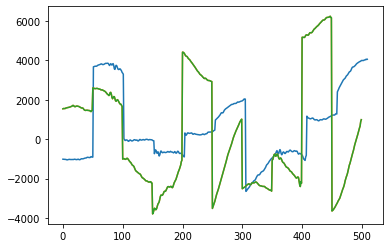

In [25]:
x_axis = np.arange(0,151,3)

x = squat150[[c for c in squat150.columns if c in x_axis]]

x0 = x[:5].T[0]
x1 = x[:5].T[1]
x2 = x[:5].T[2]
x3 = x[:5].T[3]
x4 = x[:5].T[4]
x5 = x[:10].T[5]
x6 = x[:10].T[6]
x7 = x[:10].T[7]
x8 = x[:10].T[8]
x9 = x[:10].T[9]

x_df = pd.concat([x0,x1,x2,x3,x4, x5, x6, x7, x8, x9], ignore_index=True)
x_df.plot()

y_axis = np.arange(1,151,3)

y = squat150[[c for c in squat150.columns if c in y_axis]]

y0 = y[:5].T[0]
y1 = y[:5].T[1]
y2 = y[:5].T[2]
y3 = y[:5].T[3]
y4 = y[:5].T[4]
y5 = y[:10].T[5]
y6 = y[:10].T[6]
y7 = y[:10].T[7]
y8 = y[:10].T[8]
y9 = y[:10].T[9]

y_df = pd.concat([y0,y1,y2,y3,y4, y5, y6, y7, y8, y9], ignore_index=True)
y_df.plot()

z_axis = np.arange(1,151,3)

z = squat150[[c for c in squat150.columns if c in z_axis]]

z0 = z[:5].T[0]
z1 = z[:5].T[1]
z2 = z[:5].T[2]
z3 = z[:5].T[3]
z4 = z[:5].T[4]
z5 = z[:10].T[5]
z6 = z[:10].T[6]
z7 = z[:10].T[7]
z8 = z[:10].T[8]
z9 = z[:10].T[9]

z_df = pd.concat([z0,z1,z2,z3,z4, z5, z6, z7, z8, z9], ignore_index=True)
z_df.plot()